In [3]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
le = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
linux_pro1 = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_process_1.csv')
linux_pro2 = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_process_2.csv')
linux_pro = pd.concat([linux_pro1, linux_pro2])

In [6]:
linux_pro.drop('ts', axis = 1, inplace=True)
linux_pro.drop('type', axis = 1, inplace= True)

linux_pro.head()

,PID,TRUN,TSLPI,TSLPU,POLI,NICE,PRI,RTPR,CPUNR,Status,EXC,State,CPU,CMD,label
0,3257,0,23,0,norm,0,120,0,2,N,0,S,0.13,Web-Content,0
1,1442,0,1,0,norm,0,120,0,0,N,0,S,0.09,Xorg,0
2,3197,0,63,0,norm,0,120,0,3,N,0,S,0.06,firefox,0
3,2774,0,8,0,norm,0,120,0,0,N,0,S,0.06,compiz,0
4,2797,0,5,0,norm,0,120,0,0,N,0,S,0.04,nautilus,0


In [7]:
linux_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927968 entries, 0 to 927967
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PID     int64  
 1   TRUN    int64  
 2   TSLPI   int64  
 3   TSLPU   int64  
 4   POLI    object 
 5   NICE    int64  
 6   PRI     int64  
 7   RTPR    int64  
 8   CPUNR   int64  
 9   Status  object 
 10  EXC     int64  
 11  State   object 
 12  CPU     float64
 13  CMD     object 
 14  label   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 235.3+ MB


In [8]:
linux_pro['State'].replace('S',  '-2', inplace=True)
linux_pro['State'].replace('I',  '2', inplace=True)
linux_pro['State'].replace('R',  '1', inplace=True)
linux_pro['State'].replace('E',  '0', inplace=True)
linux_pro['State'].replace('Z',  '4', inplace=True)
linux_pro['State'].replace('D',  '-1', inplace=True)
linux_pro['State'].replace('T',  '3', inplace=True)
linux_pro['State']=linux_pro['State'].astype(int)

linux_pro['Status'].replace('-',  '-1', inplace=True)
linux_pro['Status'].replace('NE',  '1', inplace=True)
linux_pro['Status'].replace('N',  '2', inplace=True)
linux_pro['Status'].replace('NS',  '3', inplace=True)
linux_pro['Status'].replace('C',  '4', inplace=True)
linux_pro['Status'].replace('NC',  '5', inplace=True)
linux_pro['Status']=linux_pro['Status'].astype(int)

linux_pro['POLI'].replace('-',  '-1', inplace=True)
linux_pro['POLI'].replace('norm',  '1', inplace=True)
linux_pro['POLI']=linux_pro['POLI'].astype(int)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
linux_pro['CMD'] = le.fit_transform(linux_pro['CMD'])

col:  PID


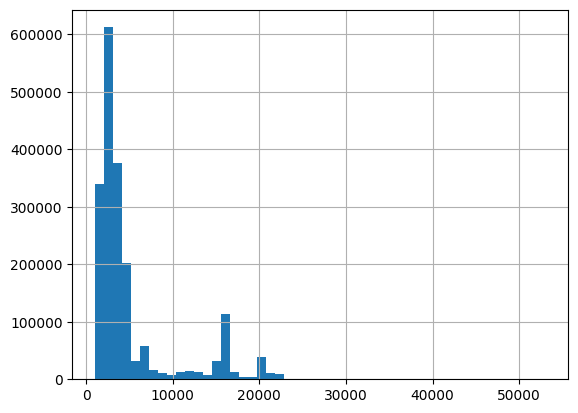

col:  TRUN


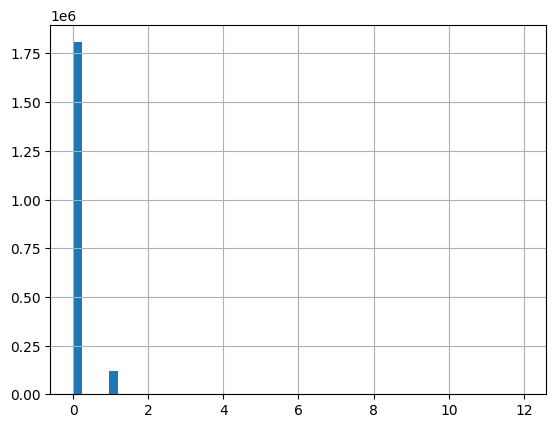

col:  TSLPI


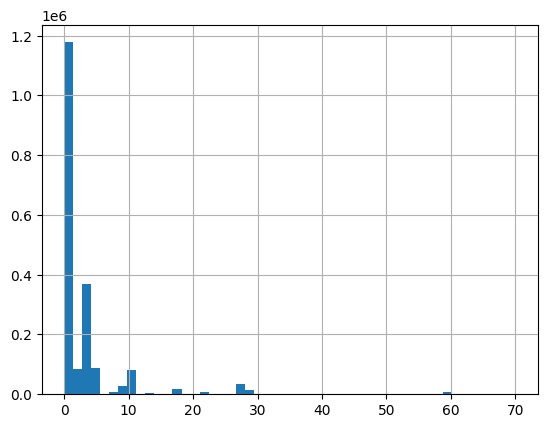

col:  TSLPU


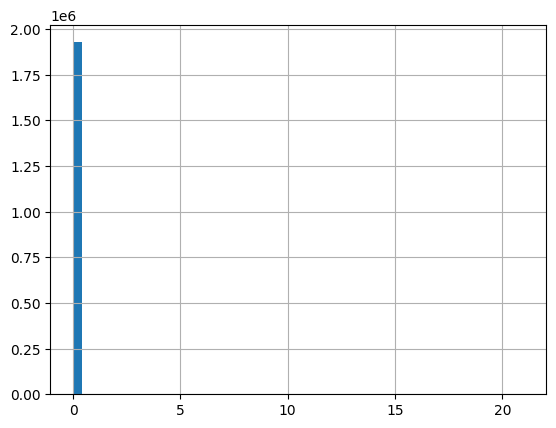

col:  POLI


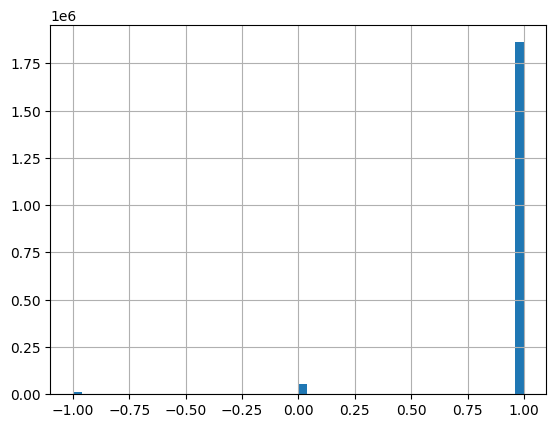

col:  NICE


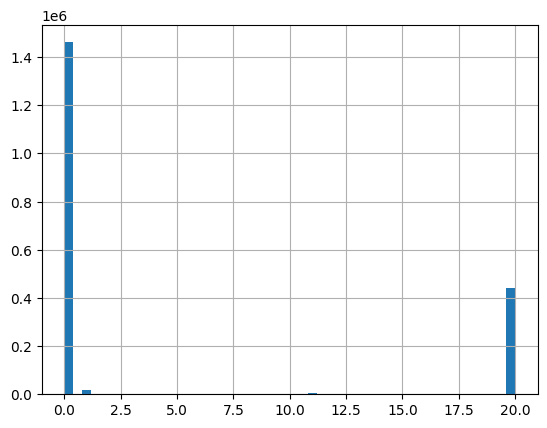

col:  PRI


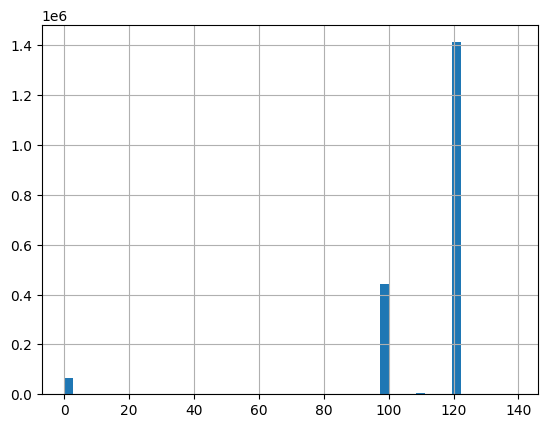

col:  RTPR


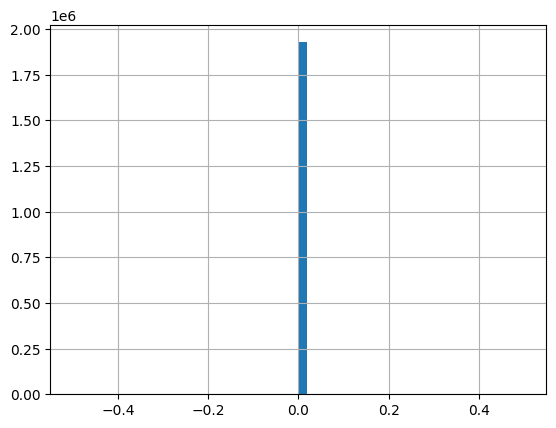

col:  CPUNR


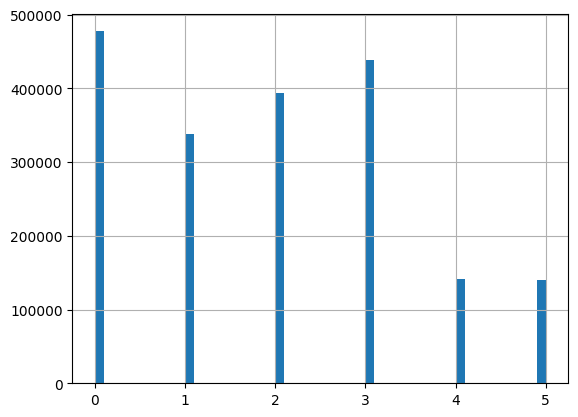

col:  Status


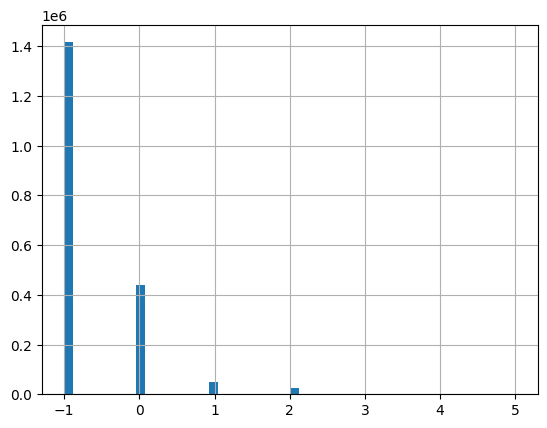

col:  EXC


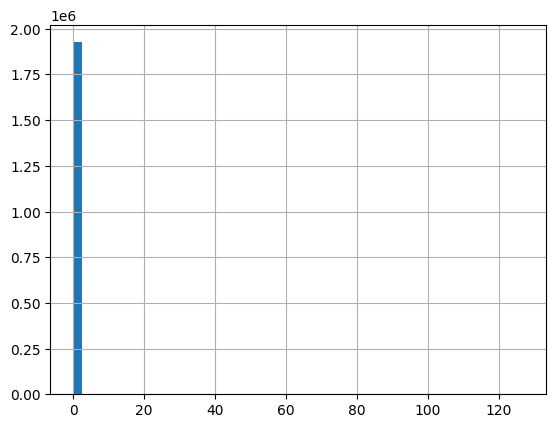

col:  State


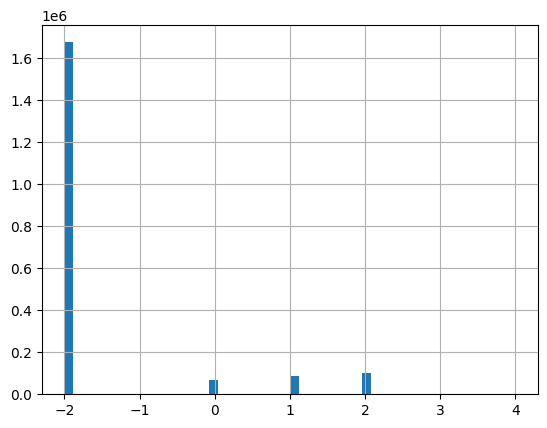

col:  CPU


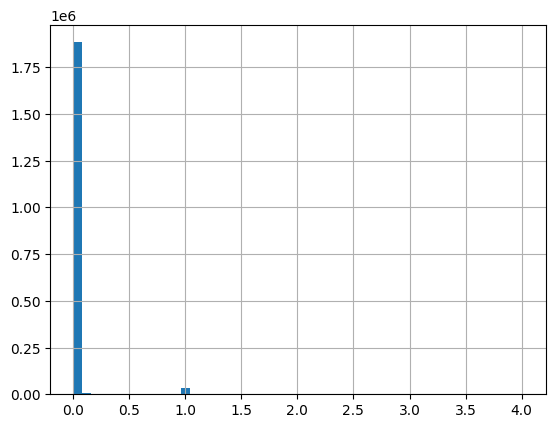

col:  CMD


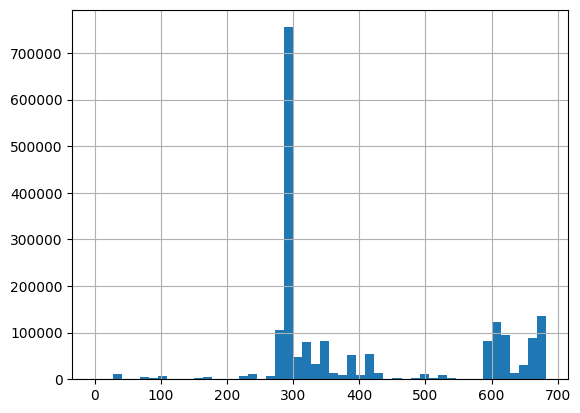

col:  label


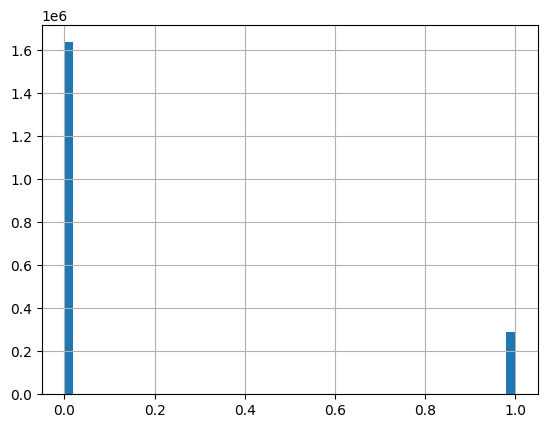

In [10]:
import matplotlib.pyplot as plt
columns = linux_pro.columns

for col in columns:
    print("col: ", col)
    linux_pro[col].hist(bins = 50)
    plt.show()

In [11]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [12]:
x = linux_pro.drop('label', axis = 1)
y = linux_pro['label']

# Without Oversampling

In [13]:
# --------------------------KNN -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions

#Accuracy Score

from sklearn.metrics import accuracy_score
knnAccuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("Accuracy of KNN: ",knnAccuracy)

#F1 Score

from sklearn.metrics import f1_score
knnF1 = round(f1_score(y_test, y_pred_knn)*100,2)
print("f1_score of KNN: ",knnF1)

#AUC Score

from sklearn.metrics import roc_auc_score
knnAuc = round(roc_auc_score (y_test, y_pred_knn)*100,2)
print('AUC Score of KNN:',knnAuc)

[0 0 0 ... 1 0 1]
Accuracy of KNN:  72.29
f1_score of KNN:  38.48
AUC Score of KNN: 66.15


<AxesSubplot: >

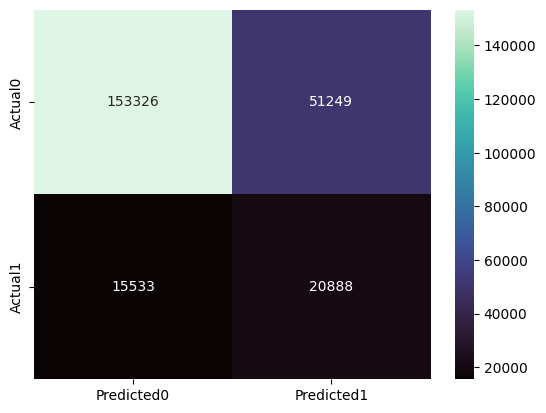

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_knn)

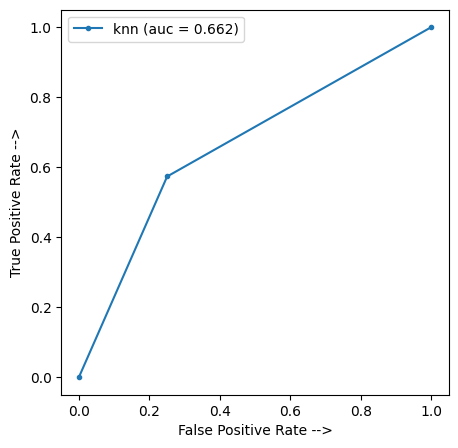

In [15]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Oversampling

In [16]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 1432029, 1: 254943}
After oversampling {0: 1432029, 1: 1432029}


In [17]:
# --------------------------KNN -----------------------------------
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
ovr_knnAccuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("Accuracy of KNN after oversampling:",ovr_knnAccuracy)

#F1 Score

from sklearn.metrics import f1_score
ovr_knnF1 = round(f1_score(y_test, y_pred_knn)*100,2)
print("f1_score of KNN after oversampling:",ovr_knnF1)

#AUC Score

from sklearn.metrics import roc_auc_score
ovr_knnAuc = round(roc_auc_score (y_test, y_pred_knn)*100,2)
print('AUC Score of KNN after oversampling:', ovr_knnAuc)

[0 0 1 ... 0 1 1]
Accuracy of KNN after oversampling: 67.88
f1_score of KNN after oversampling: 65.57
AUC Score of KNN after oversampling: 67.88


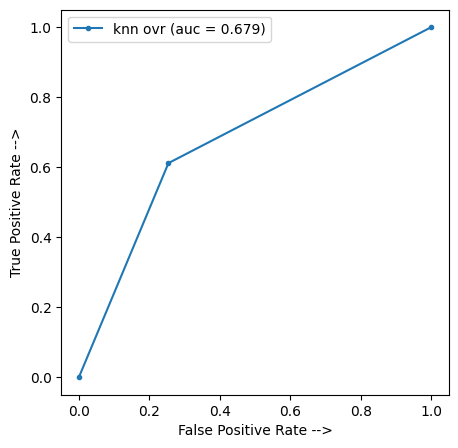

In [18]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn ovr (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

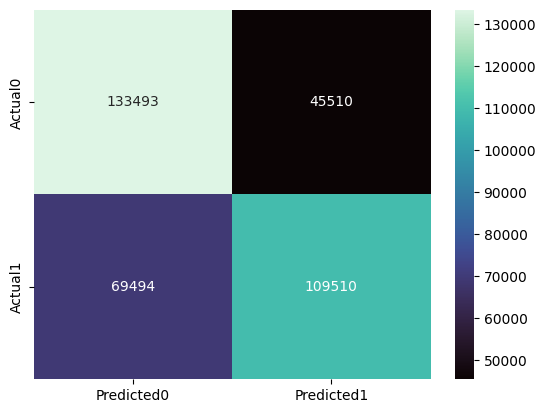

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_knn)

# Undersampling

In [20]:
for train_index, test_index in skf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter

#Seeing the value count before oversampling
print("Before undersampling", Counter(y_train))

rus = RandomUnderSampler(random_state=12)
x_undsampled, y_undsampled = rus.fit_sample(x_train, y_train)

# Seeing the value count after oversampling
print("After undersampling",Counter(y_undsampled))

Before undersampling Counter({0: 1432029, 1: 254943})
After undersampling Counter({0: 254943, 1: 254943})


In [21]:
for train_index, test_index in skf.split(x_undsampled, y_undsampled):
    x_train, x_test, y_train, y_test = x_undsampled.iloc[train_index], x_undsampled.iloc[test_index], y_undsampled.iloc[train_index], y_undsampled.iloc[test_index]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
und_knnAccuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("Accuracy of KNN undersampled : ",und_knnAccuracy)

#F1 Score

from sklearn.metrics import f1_score
und_knnF1 = round(f1_score(y_test, y_pred_knn)*100,2)
print("f1_score of KNN undersampled: ",und_knnF1)

#AUC Score

from sklearn.metrics import roc_auc_score
try:
  und_knnAuc = round(roc_auc_score (y_test, y_pred_knn)*100,2)
  print('AUC Score of KNN undersampled:', und_knnAuc)
except ValueError:
    pass



[0 0 0 ... 0 1 0]
Accuracy of KNN undersampled :  60.21
f1_score of KNN undersampled:  36.68
AUC Score of KNN undersampled: 60.21


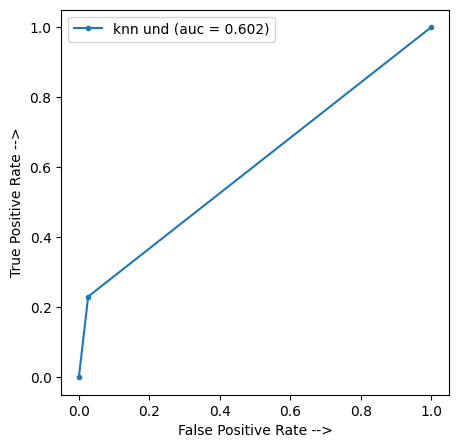

In [22]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn und (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

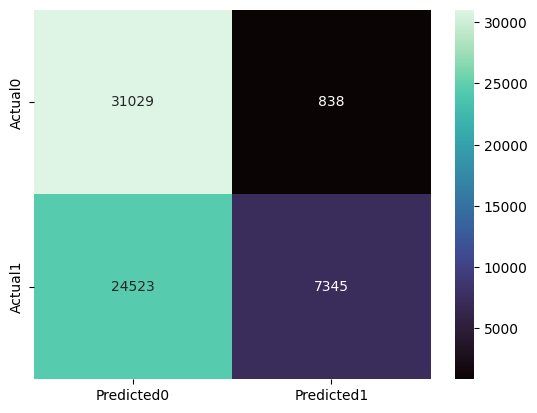

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_knn)

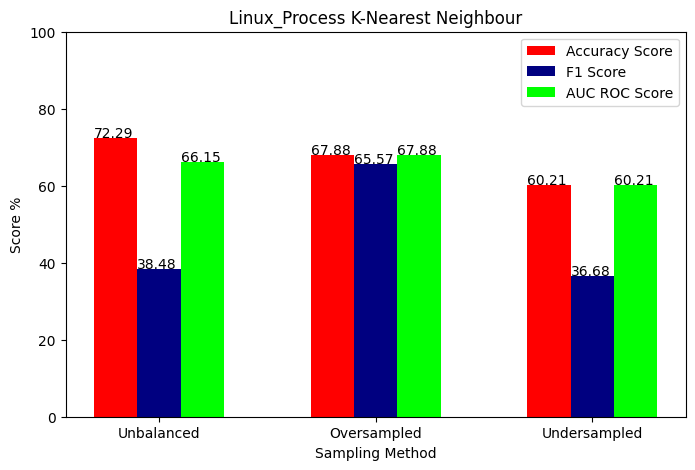

In [24]:
#Plotting a bar graph to compare the accuracy scores of the different scoring metrics
all_accuracy_scores = [knnAccuracy, ovr_knnAccuracy, und_knnAccuracy]
all_f1_scores = [knnF1, ovr_knnF1, und_knnF1]
all_auc_roc_scores = [knnAuc, ovr_knnAuc, und_knnAuc]

x_labels = ['Unbalanced', 'Oversampled', 'Undersampled']

def autolabel(rectangle_group):
    for rect in rectangle_group:
        height = rect.get_height()

        ax.annotate(str(height), xy = (rect.get_x(), height+.15))

width = 0.2

x_all_accuracy_score = [x-width for x in range (len(all_accuracy_scores))]
x_all_f1_score = [x for x in range (len(all_f1_scores))]
x_all_auc_roc_score = [x+width for x in range (len(all_auc_roc_scores))]

fig,ax = plt.subplots(figsize = (8, 5))
rect1 = ax.bar(x_all_accuracy_score ,all_accuracy_scores, width, label='Accuracy Score', color = 'red')
rect2 = ax.bar(x_all_f1_score, all_f1_scores, width, label='F1 Score', color='navy')
rect3 = ax.bar(x_all_auc_roc_score, all_auc_roc_scores, width, label='AUC ROC Score', color='lime')
plt.xticks([x for x in range(len(x_labels))], x_labels)
ax.set_title('Linux_Process K-Nearest Neighbour')
ax.set_xlabel('Sampling Method')
ax.set_ylabel('Score %')
plt.ylim([0, 100])
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
plt.show()